<a href="https://colab.research.google.com/github/ssssihoon/WE_IT/blob/main/Data_analysis/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 생성

# 산점도

sns.scatterplot(data = df, x = 'X축으로 쓸 컬럼명', y = 'y축으로 쓸 컬럼명')

In [2]:
import pandas as pd

mpg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/mpg.csv")
mpg.head() # df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Axes: xlabel='displ', ylabel='hwy'>

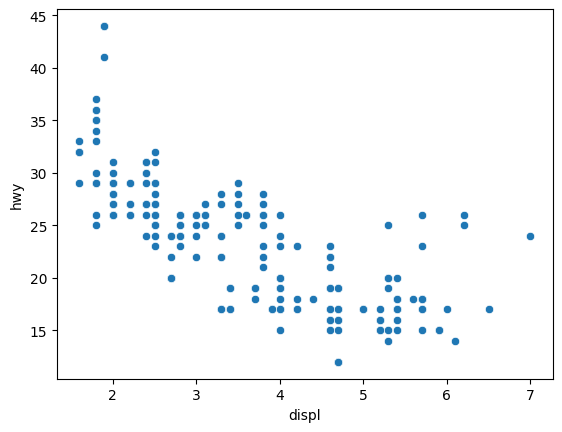

In [3]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

축 범위 지정

sns.set(xlim = (x1, x2),  ylim = (y1, y2))

[(3.0, 6.0), (10.0, 30.0)]

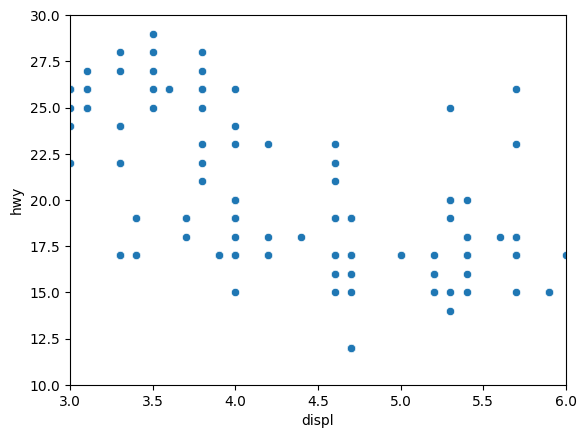

In [7]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = (3, 6), ylim = (10, 30))

종류별로 표식 색 바꾸기

hue = '색깔별로 나타내려는 컬럼명'

<Axes: xlabel='displ', ylabel='hwy'>

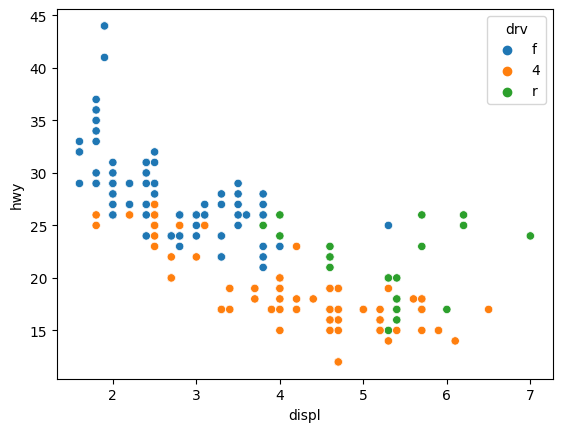

In [9]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

## Just Tip

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '150'}) # 해상도, 기본값 72 에서 변경
plt.rcParams.update({'figure.figsize' : [8, 6]}) # 가로, 세로크기, 기본값 [6, 4] 에서 변경
plt.rcParams.update({'font.size' : '15'}) # 글자 크기, 기본값 10 에서 변경
plt.rcParams.update({'font.family' : 'AppleGothic'}) # 폰트, 기본값 sans-serif 에서 변경

In [ ]:
#or
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '150',
                    'figure.figsize' : [8, 6],
                    'font.size' : '15',
                    'font.family' : 'AppleGothic'})

### 그래프 설명 메시지 숨기기

In [ ]:
#그래프 출력 코드 뒤에 ; 를 입력하면 된다.
sns.scatterplot(data = df, x = '', y = '');

# 막대 그래프

## 평균 막대 그래프

1. 집단별 평균표 만들기

In [15]:
# drv별로 분리
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean')) # hwy의 평균을 mean_hwy에 저장
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


drv가 인덱스가 되기 때문에 인덱스를 원래대로 유지하기 위한 as_index = False

In [18]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


2.그래프 만들기

<Axes: xlabel='drv', ylabel='mean_hwy'>

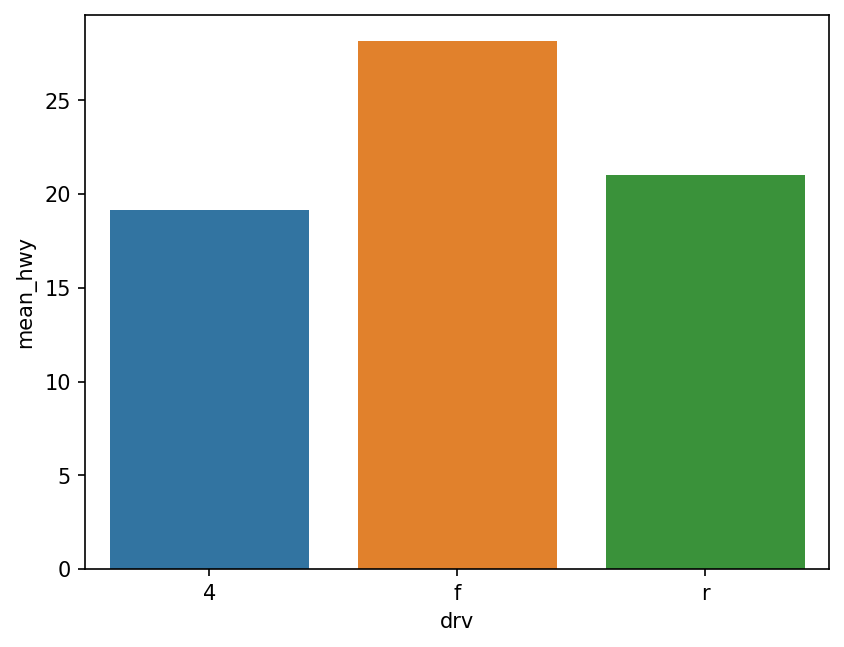

In [19]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy') # y의 값으로 hwy의 평균값을 사용

막대그래프를 크기순으로 나타내고 싶다.

정렬 -> 막대그래프 생성

df.sort_values(ascending = False)

In [ ]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False) # 데이터 프레임 정렬

<Axes: xlabel='drv', ylabel='mean_hwy'>

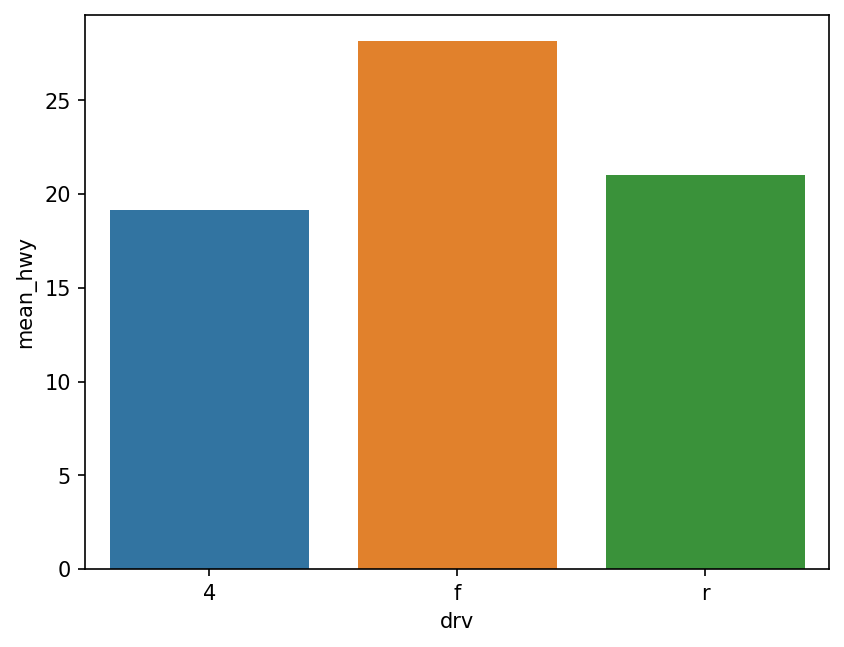

In [20]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

## 빈도 막대 그래프

count()를 사용해 빈도를 구한 후 그래프 생성

In [21]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(n = ('drv', 'count')) # drv의 빈도를 n이라는 변수에 저장
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

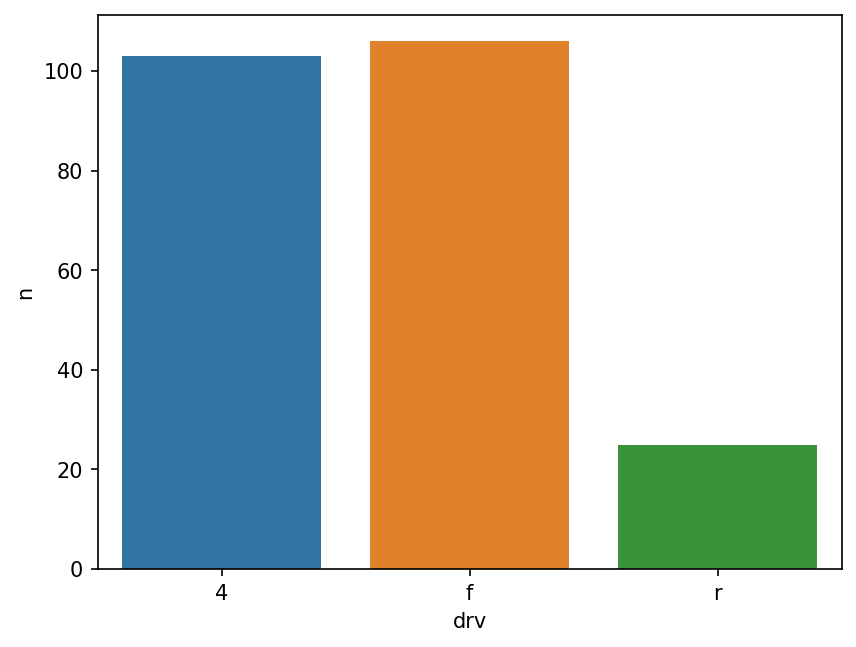

In [22]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<Axes: xlabel='drv', ylabel='count'>

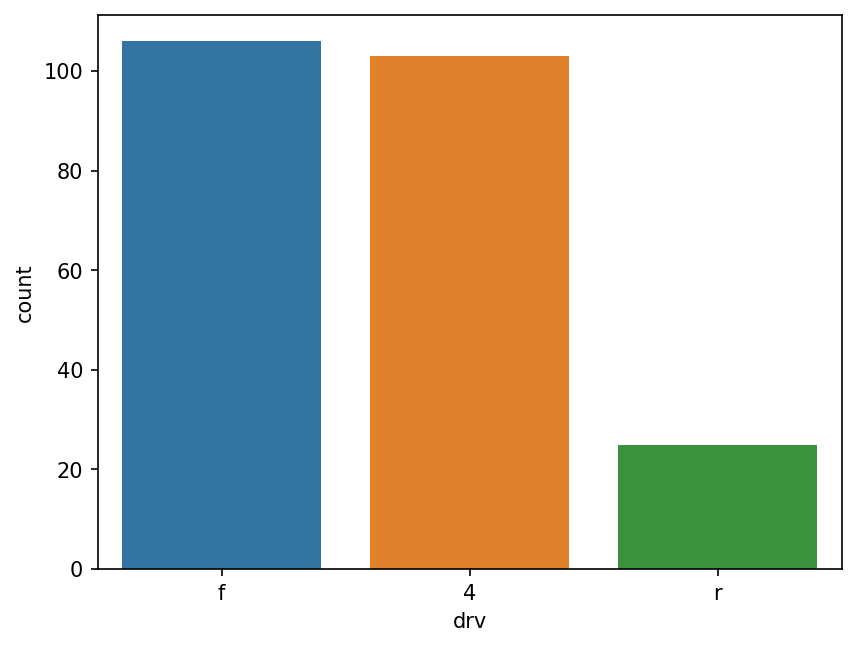

In [23]:
sns.countplot(data = mpg, x = 'drv')

barplot(count함수를 사용), countplot()이 둘은 서로 하는 역할은 같지만,

x축의 순서가 다르다. 서로 사용한 drv의 순서가 다르기 때문이다.(barplot은 groupby 때문!)

In [24]:
mpg['drv'].unique() # unique()함수를 이용해 컬럼변수의 순서를 알 수 있다.

array(['f', '4', 'r'], dtype=object)

In [25]:
df_mpg['drv'].unique() # unique()함수를 이용해 컬럼변수의 순서를 알 수 있다.

array(['4', 'f', 'r'], dtype=object)

막대그래프 순서 정렬

order = [순서1번으로 설정할 값, 순서2번으로 설정할 값, '''']

<Axes: xlabel='drv', ylabel='count'>

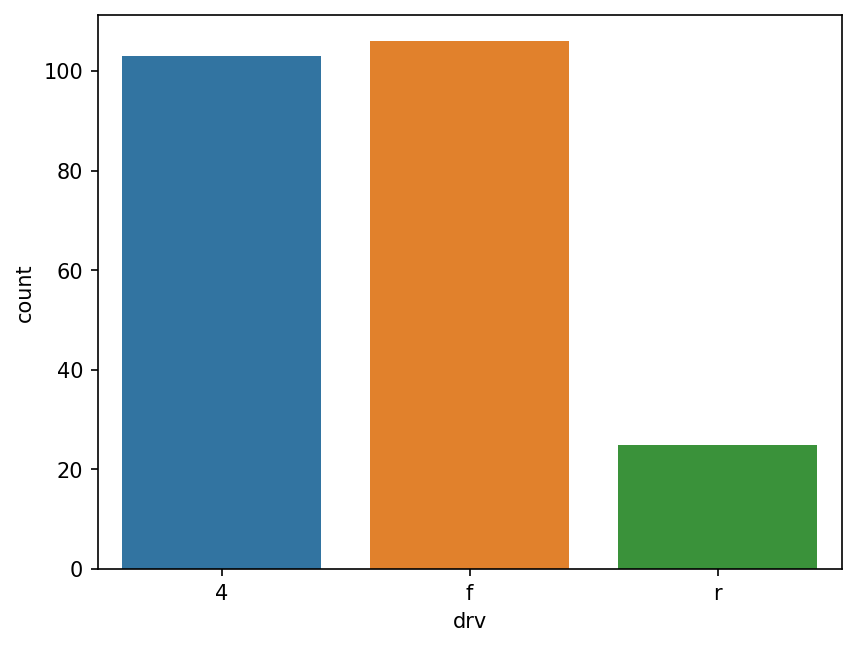

In [26]:
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

빈도가 높은 순으로 출력

<Axes: xlabel='drv', ylabel='count'>

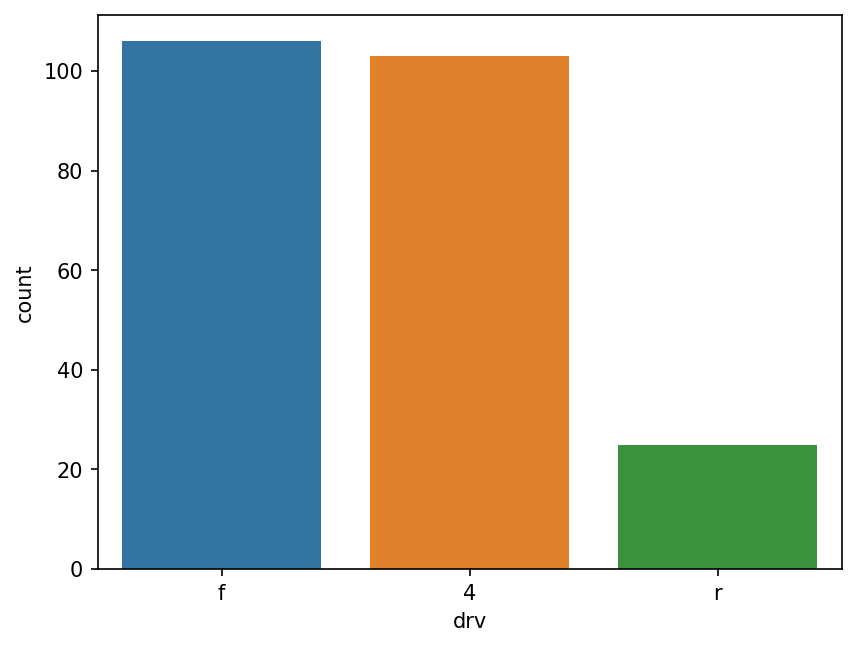

In [27]:
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

## 선 그래프

시계열 그래프 만들기

In [29]:
economics = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/economics.csv")
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

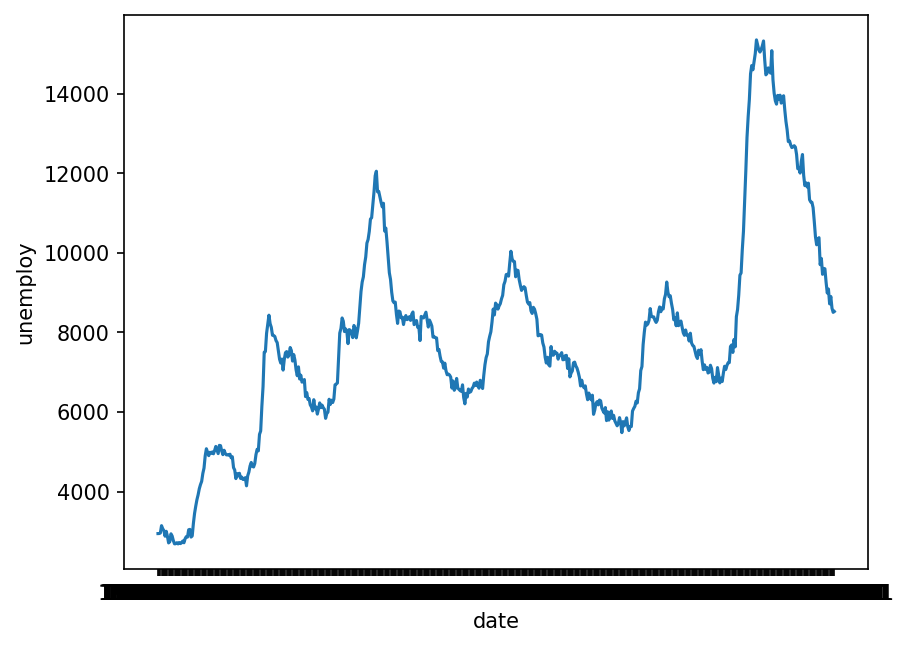

In [30]:
# 선 그래프 , x축 : date , y축 : unemploy

sns.lineplot(data = economics, x = 'date', y = 'unemploy')

x축이 겹쳐서 보이지 않는 현상이 나타난다.

=> x축에 연도만 나타나도록 설정 해 해결해야 한다. : 변수타입이 object -> datetime64로 바꿔줘야 한다.

pd.to_datetime()

In [31]:
economics['date2'] = pd.to_datetime(economics['date']) # datetime64로 변환 된 값을 date2라는 변수로 저장

In [32]:
economics.info() # 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


date2변수의 값을 연도만 따로 추출해 변수 year로 추가

In [33]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

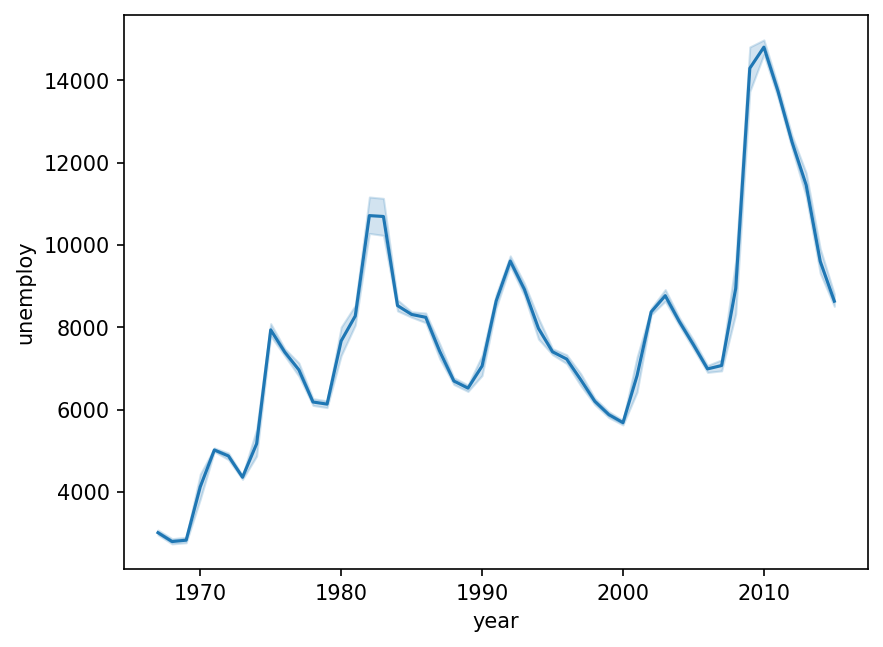

In [34]:
# 그래프 그리기
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

위 그래프에 어둡게 표기된 부분은 신뢰구간이다.

-> 없애려면 ci = None

<ipython-input-35-454e33ad57ca>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)


<Axes: xlabel='year', ylabel='unemploy'>

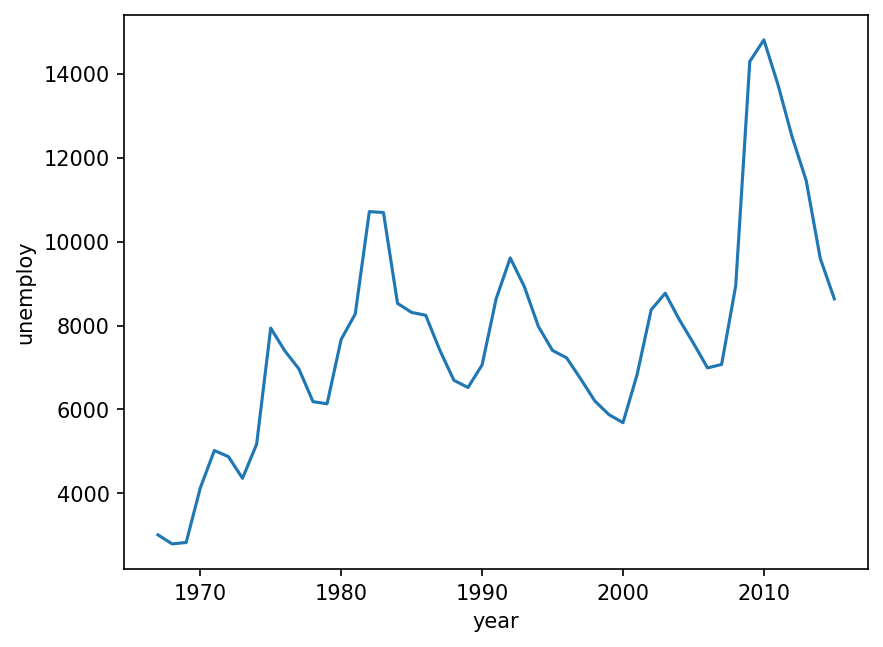

In [35]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None) # 신뢰구간을 제거한 선 그래프

## 박스그래프

데이터의 분포를 볼 때 쓰인다.

sns.boxplot()

<Axes: xlabel='drv', ylabel='hwy'>

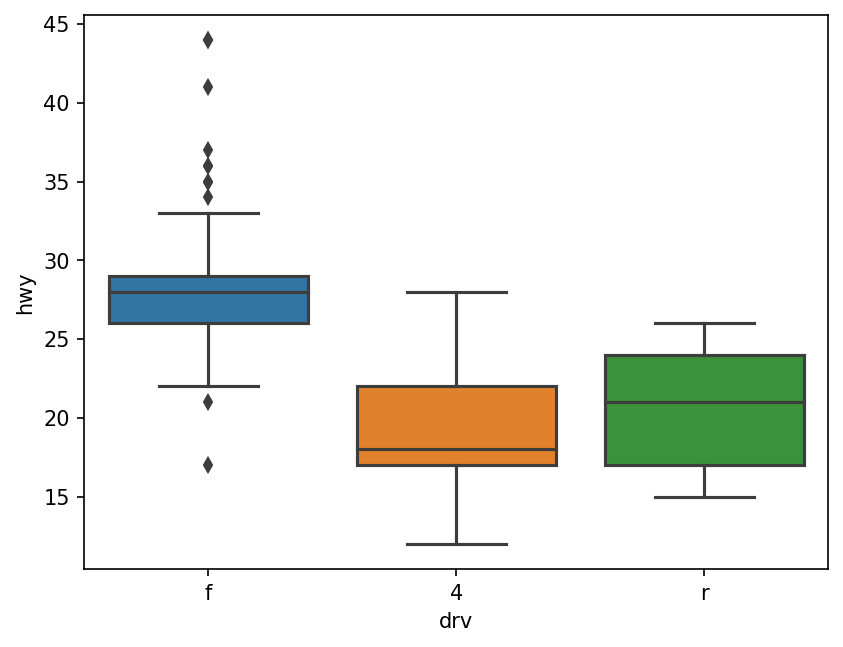

In [36]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')